# VGG-16 and Unet using one layer 

In [2]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\2nd_dataset_image\Cropped_1Channel_Mask")
#os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import PIL # pillow - image processing
import tensorflow as tf
from PIL import Image

In [4]:
from keras_segmentation.models.unet import vgg_unet

Using TensorFlow backend.


# GPU

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# Changing File names

## Test

In [5]:
# direc = "Cropped_same_name\\test\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\test\images\*.png')
# reading_masks = glob.glob(r'Cropped\test\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [6]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][26:])
# print(name_images[0:1])
# print(len(name_images))

In [ ]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\test\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\test\\Masks\\" + name_images[i])

In [ ]:
# name_images = reading_images[0][26:]
# name_images

## train

In [ ]:
# direc = "Cropped_same_name\\train\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\train\images\*.png')
# reading_masks = glob.glob(r'Cropped\train\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [ ]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][27:])
# print(name_images[0:1])
# print(len(name_images))

In [ ]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\train\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\train\\Masks\\" + name_images[i])

### Validation

In [ ]:
# direc = "Cropped_same_name\\val\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\val\images\*.png')
# reading_masks = glob.glob(r'Cropped\val\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [ ]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][25:])
# print(name_images[0:1])
# print(len(name_images))

In [ ]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\val\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\val\\Masks\\" + name_images[i])

# Cropping Images

## Test

In [7]:
reading_images = glob.glob(r'Cropped_same_name\test\Images\*.png')
reading_masks = glob.glob(r'Cropped_same_name\test\Masks\*.png')

print(reading_images[5])
print(reading_masks[0:1])

Cropped_same_name\test\Images\Batch_0_Image_11_Tile_8.png
['Cropped_same_name\\test\\Masks\\Batch_0_Image_0_Tile_5.png']


In [8]:
for i in reading_images:
    im_image = Image.open(i)
    # im_image.show()
    cropped_image =  im_image.crop((0,0,512,512))
    # cropped_image.show()
    cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
for i in reading_masks:
    im_mask = Image.open(i)
    # im_image.show()
    cropped_mask =  im_mask.crop((0,0,512,512))
    # cropped_image.show()
    cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

## Train

In [9]:
reading_images = glob.glob(r'Cropped_same_name\train\Images\*.png')
reading_masks = glob.glob(r'Cropped_same_name\train\Masks\*.png')

print(reading_images[5])
print(reading_masks[0:1])

Cropped_same_name\train\Images\Batch_0_Image_0_Tile_15.png
['Cropped_same_name\\train\\Masks\\Batch_0_Image_0_Tile_0.png']


In [10]:
for i in reading_images:
    im_image = Image.open(i)
    # im_image.show()
    cropped_image =  im_image.crop((0,0,512,512))
    # cropped_image.show()
    cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
for i in reading_masks:
    im_mask = Image.open(i)
    # im_image.show()
    cropped_mask =  im_mask.crop((0,0,512,512))
    # cropped_image.show()
    cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

## Validation

In [11]:
reading_images = glob.glob(r'Cropped_same_name\val\Images\*.png')
reading_masks = glob.glob(r'Cropped_same_name\val\Masks\*.png')

print(reading_images[5])
print(reading_masks[0:1])

Cropped_same_name\val\Images\Batch_0_Image_10_Tile_6.png
['Cropped_same_name\\val\\Masks\\Batch_0_Image_0_Tile_13.png']


In [12]:
for i in reading_images:
    im_image = Image.open(i)
    # im_image.show()
    cropped_image =  im_image.crop((0,0,512,512))
    # cropped_image.show()
    cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
for i in reading_masks:
    im_mask = Image.open(i)
    # im_image.show()
    cropped_mask =  im_mask.crop((0,0,512,512))
    # cropped_image.show()
    cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

# Reading an image

In [13]:
reading_images = glob.glob(r'Cropped_same_name_cropped\train\Images\*.png')
reading_images[0]

'Cropped_same_name_cropped\\train\\Images\\Batch_0_Image_0_Tile_0.png'

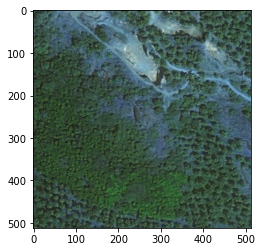

In [14]:
img = PIL.Image.open(reading_images[0], 'r')
plt.imshow(np.asarray(img))

In [15]:
image_array =  np.asarray(img)
image_array.shape

(512, 512, 3)

In [19]:
reading_mask = glob.glob(r'Cropped_same_name_cropped\train\Masks\*.png')
reading_mask[0]

'Cropped_same_name_cropped\\train\\Masks\\Batch_0_Image_0_Tile_0.png'

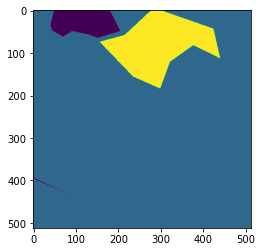

In [20]:
img = PIL.Image.open(reading_mask[0], 'r')
plt.imshow(np.asarray(img))

In [21]:
image_array =  np.asarray(img)
image_array.shape

(512, 512)

# Building the model

In [23]:
model = vgg_unet(n_classes=7 ,  input_height=512, input_width=512)

In [ ]:
callbacks = [ModelCheckpoint(filepath='Model_save\vgg_unet_best_weight\model_weights_best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1),
            EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')]

In [1]:
model.train(
    train_images =  "Cropped_same_name_cropped/train/Images/",
    train_annotations = "Cropped_same_name_cropped/train/Masks/",
    checkpoints_path = "Model_save/vgg_unet/vgg_unet_config.json" , 
    epochs=50,
    callbacks =callbacks
    
)

NameError: name 'model' is not defined

In [ ]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

In [ ]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)